# Data Exploration for Solv4x Project

## Data Exploration steps
1. Explore correlation among the variables.
2. Plot the annual trend of demand, supply and price
3. Explore feature selection using random forest

In [41]:
# Loading lib
import pandas as pd

## Loading Data
## This data is generated by the preprocessing script
link = "https://raw.githubusercontent.com/yu1inhong/solv4x_mma/main/historical_data.csv"
data = pd.read_csv(link)
data

,time,HOEP,temp_london,dwpt_london,rhum_london,prcp_london,wspd_london,pres_london,temp_ottawa,dwpt_ottawa,...,pres_toronto,holiday_bool,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total,Ontario Demand
0,2018-06-20 00:00:00,22.73,21.0,17.0,78.0,0.0,18.4,1014.3,22.8,7.4,...,1014.4,0,10234,253,4453,136,0,16,15092,14062
1,2018-06-20 01:00:00,13.35,20.0,16.0,78.0,0.0,16.6,1014.8,20.7,8.7,...,1014.2,0,10234,222,3775,136,0,12,14379,13307
2,2018-06-20 02:00:00,8.99,19.0,16.0,83.0,0.0,16.6,1014.8,17.5,9.1,...,1014.5,0,10233,220,3356,126,0,13,13948,12925
3,2018-06-20 03:00:00,12.68,19.0,15.1,78.0,0.0,9.4,1014.2,16.0,10.5,...,1014.5,0,10231,223,3346,158,0,12,13970,12630
4,2018-06-20 04:00:00,13.29,19.0,16.0,83.0,0.0,0.0,1014.1,16.8,9.7,...,1014.1,0,10234,225,3404,143,0,14,14020,12476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34589,2022-06-19 20:00:00,63.87,21.0,5.0,35.0,0.0,16.6,1023.3,20.9,4.4,...,1020.9,0,9728,384,5542,349,6,0,16009,14811
34590,2022-06-19 21:00:00,65.32,21.0,4.1,33.0,0.0,22.3,1023.3,21.5,4.1,...,1020.7,0,9732,257,5674,344,1,1,16009,14973
34591,2022-06-19 22:00:00,415.54,19.0,3.2,35.0,0.0,13.0,1022.9,21.2,3.4,...,1020.8,0,9729,214,5572,396,0,13,15924,14204
34592,2022-06-19 23:00:00,34.19,18.0,1.1,32.0,0.3,11.2,1023.0,20.8,2.1,...,1020.8,0,9724,160,4774,547,0,12,15217,12996


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34594 entries, 0 to 34593
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             34594 non-null  object 
 1   HOEP             34594 non-null  float64
 2   temp_london      34594 non-null  float64
 3   dwpt_london      34594 non-null  float64
 4   rhum_london      34594 non-null  float64
 5   prcp_london      34594 non-null  float64
 6   wspd_london      34594 non-null  float64
 7   pres_london      34594 non-null  float64
 8   temp_ottawa      34594 non-null  float64
 9   dwpt_ottawa      34594 non-null  float64
 10  rhum_ottawa      34594 non-null  float64
 11  prcp_ottawa      34594 non-null  float64
 12  wspd_ottawa      34594 non-null  float64
 13  pres_ottawa      34594 non-null  float64
 14  temp_sudbury     34594 non-null  float64
 15  dwpt_sudbury     34594 non-null  float64
 16  rhum_sudbury     34594 non-null  float64
 17  prcp_sudbury

In [43]:
data['time'] = pd.to_datetime(data.time) ## reformat variable type

## Correlation Exploration

Correlation heatmaps contain a solid diagonal line which represents the correlation of each feature with itself. These plots aim to identify highly correlated features shown in the off-diagonal values quickly.

In this section we explore the correlation of the variables (except the variable time) using heatmap and correlation matrix.

We first divided the variables into two groups, weather and non-weather. Then we plot the correaltion of the weather variables with our target variable HOPE and the non-weather variables with target variable.

In [44]:
weather = data.iloc[:,1:32]
weather

,HOEP,temp_london,dwpt_london,rhum_london,prcp_london,wspd_london,pres_london,temp_ottawa,dwpt_ottawa,rhum_ottawa,...,rhum_thunderbay,prcp_thunderbay,wspd_thunderbay,pres_thunderbay,temp_toronto,dwpt_toronto,rhum_toronto,prcp_toronto,wspd_toronto,pres_toronto
0,22.73,21.0,17.0,78.0,0.0,18.4,1014.3,22.8,7.4,37.0,...,47.0,0.0,18.4,1015.7,20.0,8.3,47.0,0.0,18.4,1014.4
1,13.35,20.0,16.0,78.0,0.0,16.6,1014.8,20.7,8.7,46.0,...,53.0,0.0,16.6,1015.3,19.4,7.5,46.0,0.0,16.6,1014.2
2,8.99,19.0,16.0,83.0,0.0,16.6,1014.8,17.5,9.1,58.0,...,60.0,0.0,16.6,1015.2,19.7,7.1,44.0,0.0,16.6,1014.5
3,12.68,19.0,15.1,78.0,0.0,9.4,1014.2,16.0,10.5,70.0,...,77.0,0.0,9.4,1015.2,18.8,9.0,53.0,0.0,9.4,1014.5
4,13.29,19.0,16.0,83.0,0.0,0.0,1014.1,16.8,9.7,63.0,...,88.0,0.0,0.0,1015.0,17.9,7.6,51.0,0.0,0.0,1014.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34589,63.87,21.0,5.0,35.0,0.0,16.6,1023.3,20.9,4.4,34.0,...,82.0,0.0,22.3,1016.6,21.0,-3.5,19.0,0.0,9.4,1020.9
34590,65.32,21.0,4.1,33.0,0.0,22.3,1023.3,21.5,4.1,32.0,...,82.0,0.0,7.6,1015.0,20.4,-4.7,18.0,0.0,9.4,1020.7
34591,415.54,19.0,3.2,35.0,0.0,13.0,1022.9,21.2,3.4,31.0,...,77.0,0.0,14.8,1014.3,19.9,-5.9,17.0,0.0,3.6,1020.8
34592,34.19,18.0,1.1,32.0,0.3,11.2,1023.0,20.8,2.1,29.0,...,77.0,0.0,16.6,1014.1,18.8,-7.6,16.0,0.0,7.6,1020.8


In [45]:
non_weather = data.iloc[:,[1,32,33,34,35,36,37,38,39,40]]
non_weather

,HOEP,holiday_bool,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Total,Ontario Demand
0,22.73,0,10234,253,4453,136,0,16,15092,14062
1,13.35,0,10234,222,3775,136,0,12,14379,13307
2,8.99,0,10233,220,3356,126,0,13,13948,12925
3,12.68,0,10231,223,3346,158,0,12,13970,12630
4,13.29,0,10234,225,3404,143,0,14,14020,12476
...,...,...,...,...,...,...,...,...,...,...
34589,63.87,0,9728,384,5542,349,6,0,16009,14811
34590,65.32,0,9732,257,5674,344,1,1,16009,14973
34591,415.54,0,9729,214,5572,396,0,13,15924,14204
34592,34.19,0,9724,160,4774,547,0,12,15217,12996


### Explore weather variables

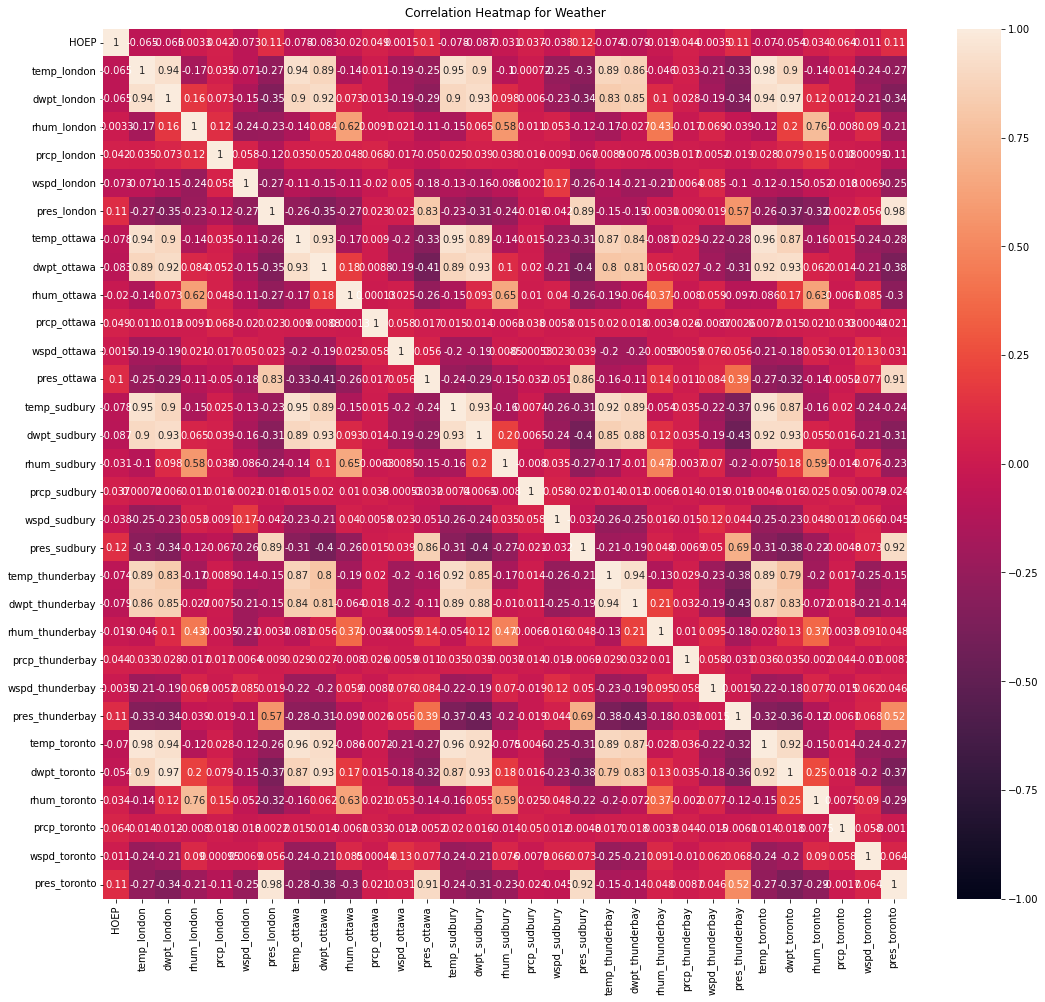

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 16))
heatmap = sns.heatmap(weather.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for Weather', fontdict={'fontsize':12}, pad=12);

### Analysis:

Temperatures and dew point temperatures are highly associate with each others. We should only use one type of temperature in the dataset.

We can see that Toronto's temperature are highly associated with other 4 cities tempratures. This means the temperatures in Ontario does not vary much by city. We should only keep one temperature in our variable set. Because Toronto is the largest city in Ontario, we choose to keep Toronto's temperature. 

Also, we have found that the pressure in Toronto is highly associated with pressure in London, Ottawa and Sudbury. Thus, we can drop the three other pressure data and only keep Toronto's pressure data

In [47]:
# Record the variables that we want to drop
weather_drop = ['temp_london','temp_ottawa','temp_sudbury','temp_thunderbay','dwpt_london','dwpt_ottawa','dwpt_sudbury','dwpt_thunderbay','dwpt_toronto','pres_london','pres_ottawa','pres_sudbury']

### Explore non-weather variables

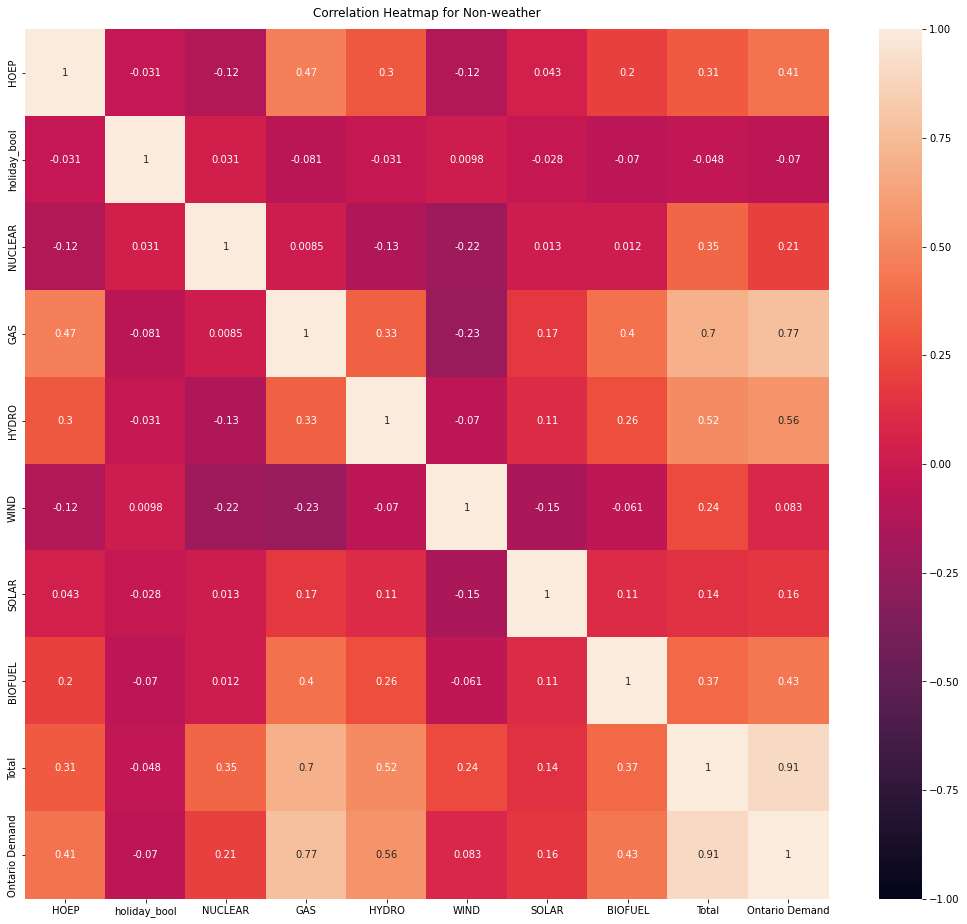

In [48]:
plt.figure(figsize=(18, 16))
heatmap = sns.heatmap(non_weather.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for Non-weather', fontdict={'fontsize':12}, pad=12);

### Analysis:
From the correlation plot above, we can see that total is highly associated with Ontario Demand. Thus, we should only keep one of the variable. In this case, we choose to keep ontario demand.

In [49]:
non_weather_drop = ['Total']

### Drop Highly Correlated Variables afer Correaltion Analysis 

In [50]:
data = data.drop(columns = weather_drop)
data = data.drop(columns = non_weather_drop)
data

,time,HOEP,rhum_london,prcp_london,wspd_london,rhum_ottawa,prcp_ottawa,wspd_ottawa,rhum_sudbury,prcp_sudbury,...,wspd_toronto,pres_toronto,holiday_bool,NUCLEAR,GAS,HYDRO,WIND,SOLAR,BIOFUEL,Ontario Demand
0,2018-06-20 00:00:00,22.73,78.0,0.0,18.4,37.0,0.0,18.4,34.0,0.0,...,18.4,1014.4,0,10234,253,4453,136,0,16,14062
1,2018-06-20 01:00:00,13.35,78.0,0.0,16.6,46.0,0.0,16.6,49.0,0.0,...,16.6,1014.2,0,10234,222,3775,136,0,12,13307
2,2018-06-20 02:00:00,8.99,83.0,0.0,16.6,58.0,0.0,16.6,68.0,0.0,...,16.6,1014.5,0,10233,220,3356,126,0,13,12925
3,2018-06-20 03:00:00,12.68,78.0,0.0,9.4,70.0,0.0,9.4,68.0,0.0,...,9.4,1014.5,0,10231,223,3346,158,0,12,12630
4,2018-06-20 04:00:00,13.29,83.0,0.0,0.0,63.0,0.0,0.0,72.0,0.0,...,0.0,1014.1,0,10234,225,3404,143,0,14,12476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34589,2022-06-19 20:00:00,63.87,35.0,0.0,16.6,34.0,0.0,18.4,26.0,0.0,...,9.4,1020.9,0,9728,384,5542,349,6,0,14811
34590,2022-06-19 21:00:00,65.32,33.0,0.0,22.3,32.0,0.0,5.4,30.0,0.0,...,9.4,1020.7,0,9732,257,5674,344,1,1,14973
34591,2022-06-19 22:00:00,415.54,35.0,0.0,13.0,31.0,0.0,11.2,35.0,0.0,...,3.6,1020.8,0,9729,214,5572,396,0,13,14204
34592,2022-06-19 23:00:00,34.19,32.0,0.3,11.2,29.0,0.0,11.2,47.0,0.0,...,7.6,1020.8,0,9724,160,4774,547,0,12,12996


Now the dataset only has 33 variables. We have drop 13 variables from the 

---

dataset.

## Supply, Deamand, Price Historical Trend Analysis

### Demand

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


year
2018    AxesSubplot(0.125,0.2;0.775x0.68)
2019    AxesSubplot(0.125,0.2;0.775x0.68)
2020    AxesSubplot(0.125,0.2;0.775x0.68)
2021    AxesSubplot(0.125,0.2;0.775x0.68)
2022    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Ontario Demand, dtype: object

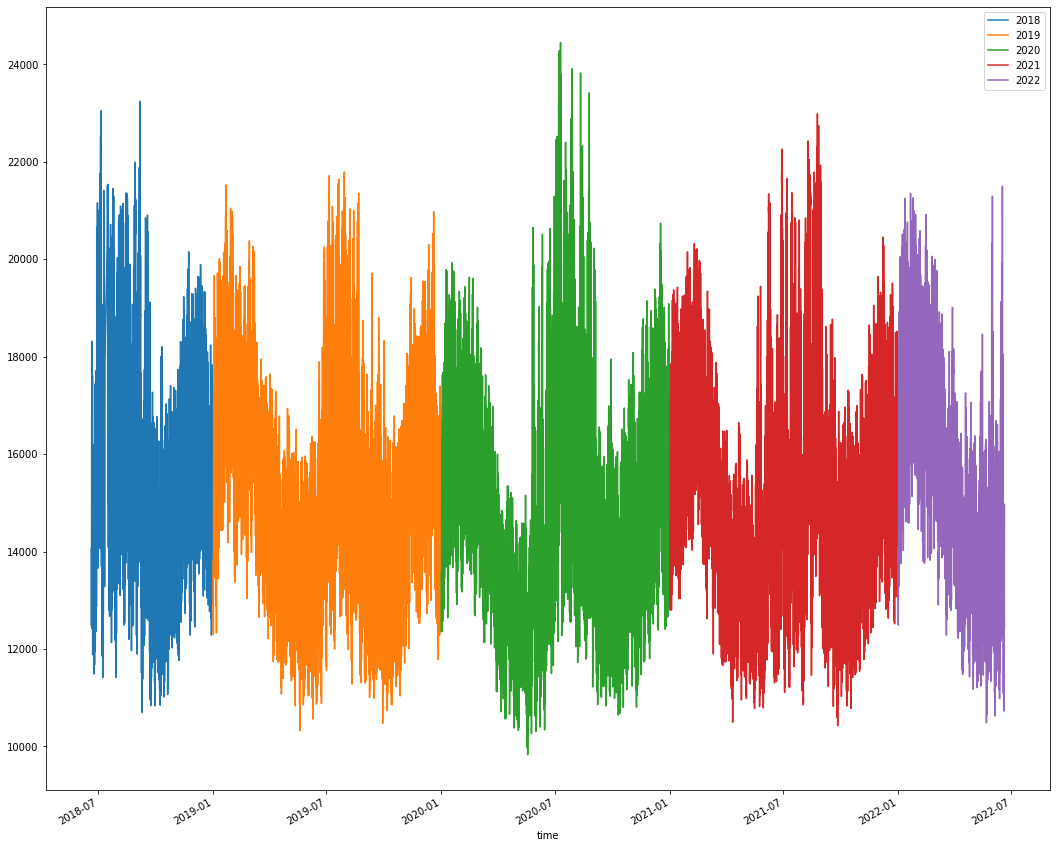

In [51]:
demand = data[['time','Ontario Demand']]
import matplotlib.pyplot as plt
from datetime import datetime

demand['year'] = demand.time.dt.year
demand.set_index('time', inplace=True)
plt.figure(figsize=(18, 16))
demand.groupby('year')['Ontario Demand'].plot(legend=True)

### Price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


year
2018    AxesSubplot(0.125,0.2;0.775x0.68)
2019    AxesSubplot(0.125,0.2;0.775x0.68)
2020    AxesSubplot(0.125,0.2;0.775x0.68)
2021    AxesSubplot(0.125,0.2;0.775x0.68)
2022    AxesSubplot(0.125,0.2;0.775x0.68)
Name: HOEP, dtype: object

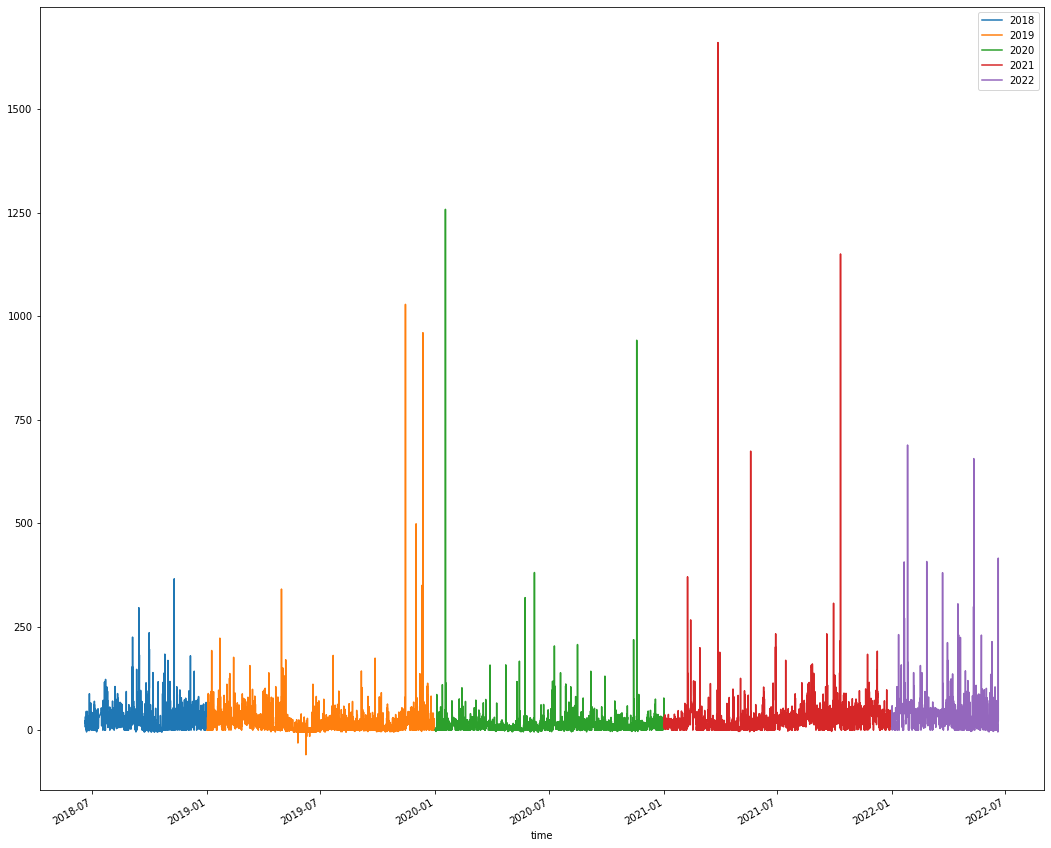

In [52]:
price= data[['time','HOEP']]
import matplotlib.pyplot as plt
from datetime import datetime

price['year'] = price.time.dt.year
price.set_index('time', inplace=True)
plt.figure(figsize=(18, 16))
price.groupby('year')['HOEP'].plot(legend=True)

### Supply

- Gas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


year
2018    AxesSubplot(0.125,0.2;0.775x0.68)
2019    AxesSubplot(0.125,0.2;0.775x0.68)
2020    AxesSubplot(0.125,0.2;0.775x0.68)
2021    AxesSubplot(0.125,0.2;0.775x0.68)
2022    AxesSubplot(0.125,0.2;0.775x0.68)
Name: GAS, dtype: object

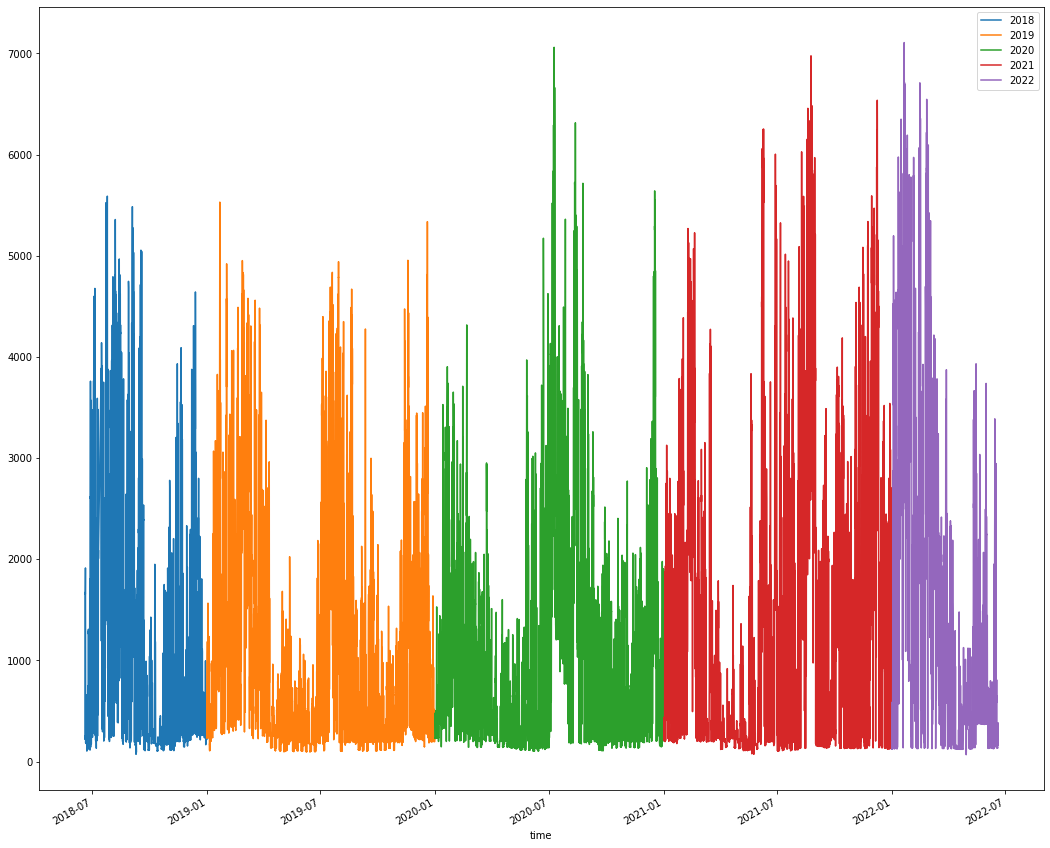

In [53]:
gas= data[['time','GAS']]
import matplotlib.pyplot as plt
from datetime import datetime

gas['year'] = gas.time.dt.year
gas.set_index('time', inplace=True)
plt.figure(figsize=(18, 16))
gas.groupby('year')['GAS'].plot(legend=True)

- Nuclear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


year
2018    AxesSubplot(0.125,0.2;0.775x0.68)
2019    AxesSubplot(0.125,0.2;0.775x0.68)
2020    AxesSubplot(0.125,0.2;0.775x0.68)
2021    AxesSubplot(0.125,0.2;0.775x0.68)
2022    AxesSubplot(0.125,0.2;0.775x0.68)
Name: NUCLEAR, dtype: object

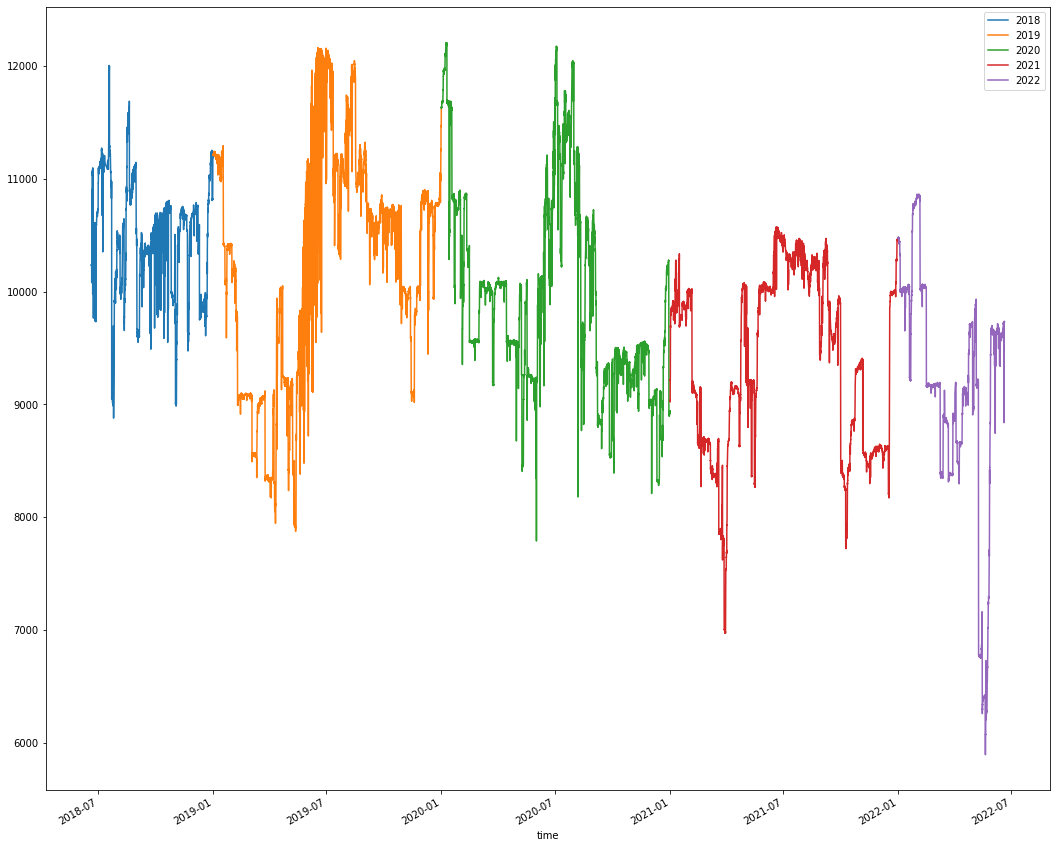

In [54]:
nuclear= data[['time','NUCLEAR']]
nuclear['year'] = nuclear.time.dt.year
nuclear.set_index('time', inplace=True)
plt.figure(figsize=(18, 16))
nuclear.groupby('year')['NUCLEAR'].plot(legend=True)

- Hydro

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


year
2018    AxesSubplot(0.125,0.2;0.775x0.68)
2019    AxesSubplot(0.125,0.2;0.775x0.68)
2020    AxesSubplot(0.125,0.2;0.775x0.68)
2021    AxesSubplot(0.125,0.2;0.775x0.68)
2022    AxesSubplot(0.125,0.2;0.775x0.68)
Name: HYDRO, dtype: object

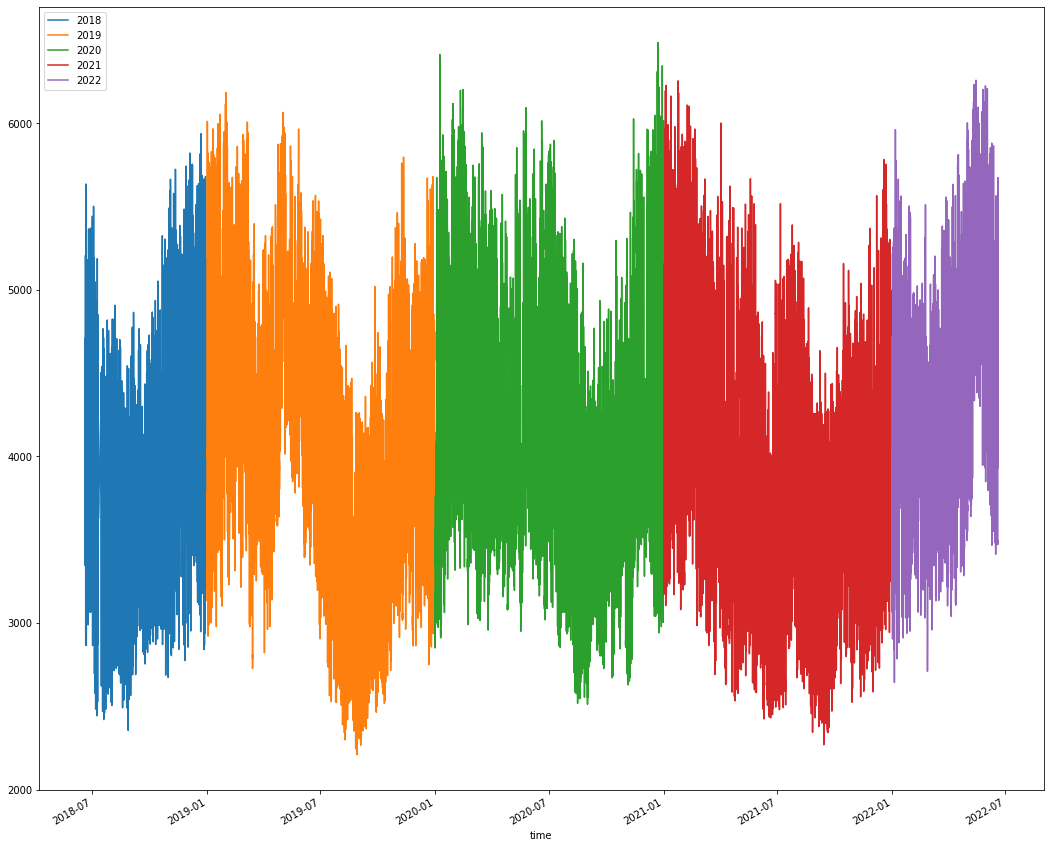

In [55]:
hydro= data[['time','HYDRO']]
hydro['year'] = hydro.time.dt.year
hydro.set_index('time', inplace=True)
plt.figure(figsize=(18, 16))
hydro.groupby('year')['HYDRO'].plot(legend=True)

- Wind

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


year
2018    AxesSubplot(0.125,0.2;0.775x0.68)
2019    AxesSubplot(0.125,0.2;0.775x0.68)
2020    AxesSubplot(0.125,0.2;0.775x0.68)
2021    AxesSubplot(0.125,0.2;0.775x0.68)
2022    AxesSubplot(0.125,0.2;0.775x0.68)
Name: WIND, dtype: object

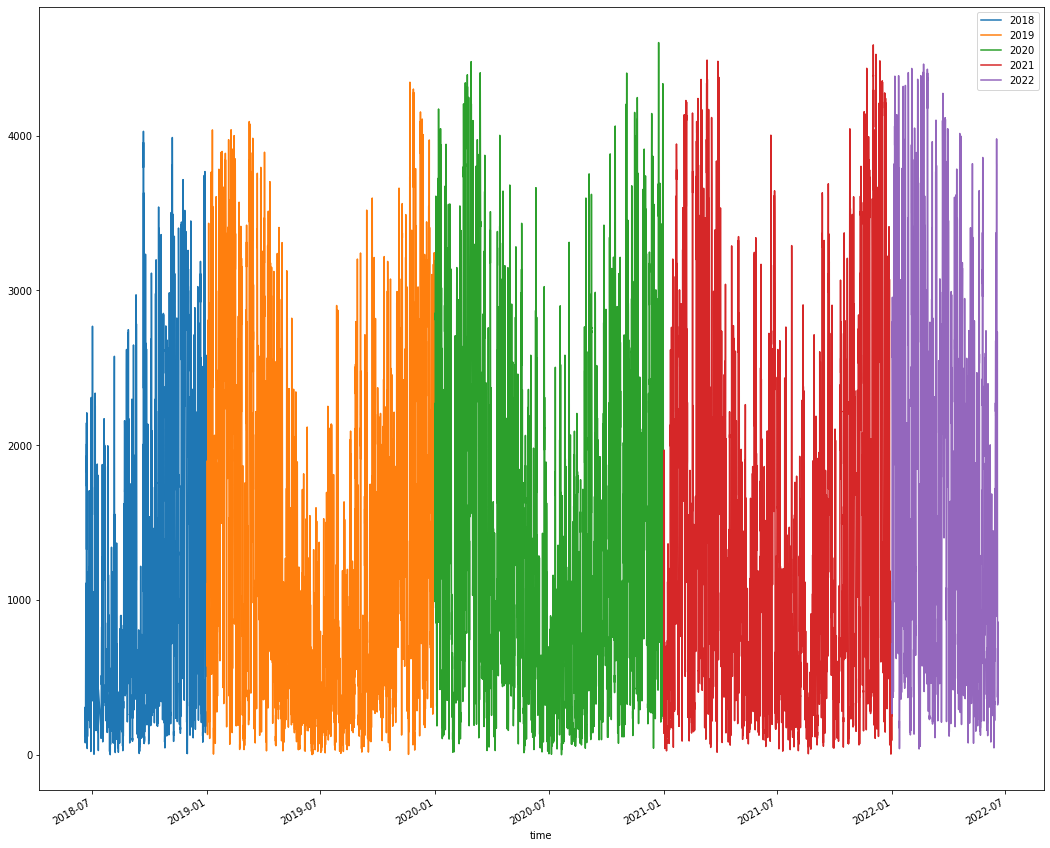

In [56]:
wind= data[['time','WIND']]
wind['year'] = wind.time.dt.year
wind.set_index('time', inplace=True)
plt.figure(figsize=(18, 16))
wind.groupby('year')['WIND'].plot(legend=True)

- Solar

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


year
2018    AxesSubplot(0.125,0.2;0.775x0.68)
2019    AxesSubplot(0.125,0.2;0.775x0.68)
2020    AxesSubplot(0.125,0.2;0.775x0.68)
2021    AxesSubplot(0.125,0.2;0.775x0.68)
2022    AxesSubplot(0.125,0.2;0.775x0.68)
Name: SOLAR, dtype: object

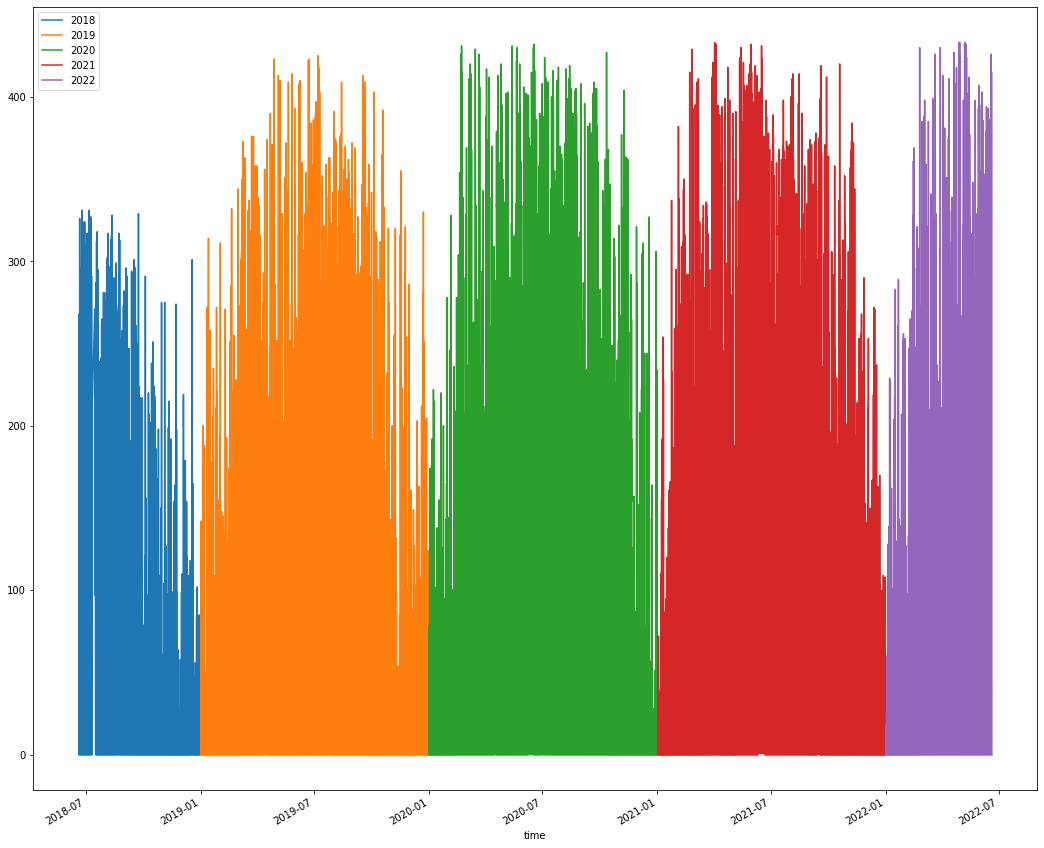

In [57]:
solar= data[['time','SOLAR']]
solar['year'] = solar.time.dt.year
solar.set_index('time', inplace=True)
plt.figure(figsize=(18, 16))
solar.groupby('year')['SOLAR'].plot(legend=True)

- Biofuel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


year
2018    AxesSubplot(0.125,0.2;0.775x0.68)
2019    AxesSubplot(0.125,0.2;0.775x0.68)
2020    AxesSubplot(0.125,0.2;0.775x0.68)
2021    AxesSubplot(0.125,0.2;0.775x0.68)
2022    AxesSubplot(0.125,0.2;0.775x0.68)
Name: BIOFUEL, dtype: object

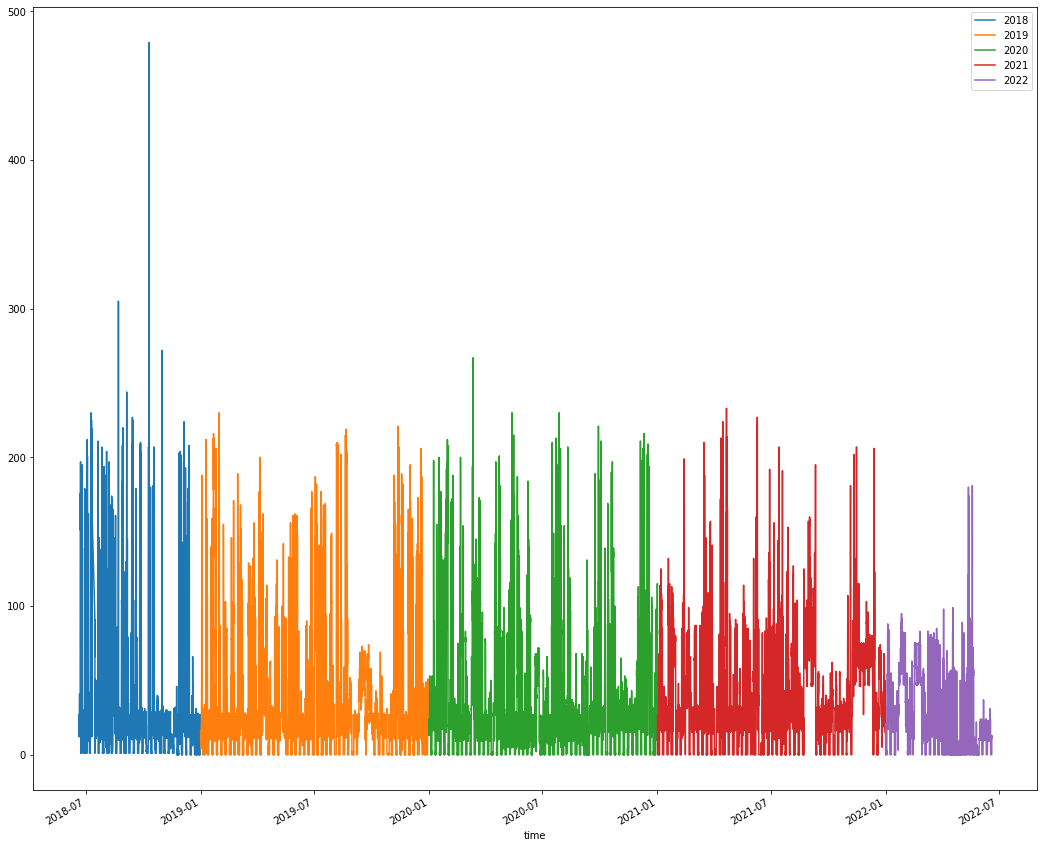

In [58]:
biofuel= data[['time','BIOFUEL']]
biofuel['year'] = biofuel.time.dt.year
biofuel.set_index('time', inplace=True)
plt.figure(figsize=(18, 16))
biofuel.groupby('year')['BIOFUEL'].plot(legend=True)

## Features Selection using Random Forest

In [59]:
# import pakages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns

In [60]:
# remove target vatiable and index
X = data.drop(columns = ['HOEP','time'])
# set target variable
y = data.HOEP

# split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [61]:
# Fit the Random Forest Regressor with 100 Decision Trees:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
# get the feature importances
rf.feature_importances_

array([0.02058503, 0.02389398, 0.02758377, 0.01890998, 0.00373617,
       0.01272667, 0.02891178, 0.00527578, 0.01628497, 0.01623807,
       0.00428403, 0.02890013, 0.02450914, 0.03421594, 0.01929322,
       0.00690448, 0.01910306, 0.07167884, 0.00232697, 0.08016021,
       0.31338598, 0.08244337, 0.04801841, 0.01800543, 0.02528148,
       0.04734307])

Text(0, 0.5, 'FEATURE NAMES')

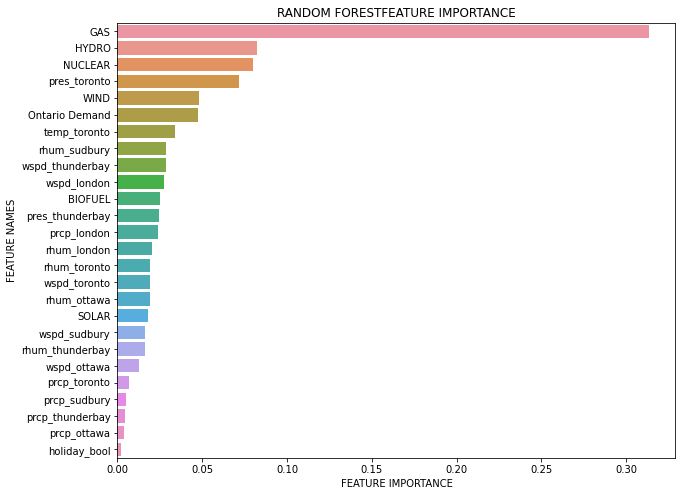

In [63]:
#Create arrays from feature importance and feature names
feature_importance = np.array(rf.feature_importances_)
feature_names = np.array(X_train.columns)

#Create a DataFrame using a Dictionary
df={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(df)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('RANDOM FOREST' + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

## Feature selection result

Based on the feature importance score above, we select the top 10 important variables.

In [65]:
selected_variable = ['time','HOEP','GAS','HYDRO','NUCLEAR','pres_toronto','WIND','Ontario Demand','temp_toronto','rhum_sudbury','wspd_thunderbay','wspd_london','BIOFUEL']

In [67]:
feature_selection_result = data[selected_variable]
feature_selection_result

,time,HOEP,GAS,HYDRO,NUCLEAR,pres_toronto,WIND,Ontario Demand,temp_toronto,rhum_sudbury,wspd_thunderbay,wspd_london,BIOFUEL
0,2018-06-20 00:00:00,22.73,253,4453,10234,1014.4,136,14062,20.0,34.0,18.4,18.4,16
1,2018-06-20 01:00:00,13.35,222,3775,10234,1014.2,136,13307,19.4,49.0,16.6,16.6,12
2,2018-06-20 02:00:00,8.99,220,3356,10233,1014.5,126,12925,19.7,68.0,16.6,16.6,13
3,2018-06-20 03:00:00,12.68,223,3346,10231,1014.5,158,12630,18.8,68.0,9.4,9.4,12
4,2018-06-20 04:00:00,13.29,225,3404,10234,1014.1,143,12476,17.9,72.0,0.0,0.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34589,2022-06-19 20:00:00,63.87,384,5542,9728,1020.9,349,14811,21.0,26.0,22.3,16.6,0
34590,2022-06-19 21:00:00,65.32,257,5674,9732,1020.7,344,14973,20.4,30.0,7.6,22.3,1
34591,2022-06-19 22:00:00,415.54,214,5572,9729,1020.8,396,14204,19.9,35.0,14.8,13.0,13
34592,2022-06-19 23:00:00,34.19,160,4774,9724,1020.8,547,12996,18.8,47.0,16.6,11.2,12


In [68]:

## Explore to CSV
from google.colab import files
feature_selection_result.to_csv('feature_selection_result.csv',index=False) 
files.download('feature_selection_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>